In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, scale 
import tensorflow
from tensorflow import keras
# from tensorflow.keras import layers,models
# import tokenize 
from keras.preprocessing.text import Tokenizer

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# We will visualize the messages with a word cloud
# from wordcloud import WordCloud


# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.neighbors import KNeighborsClassifier


# Import Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the Label Encoder
from sklearn.preprocessing import LabelEncoder

# Import the train test split
from sklearn.model_selection import train_test_split

# To evaluate our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [83]:
data=pd.read_csv('fake_or_real_news.csv')

data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [84]:
data.drop('title', inplace=True, axis=1)
data.head()


,Unnamed: 0,text,label
0,8476,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,It's primary day in New York and front-runners...,REAL


REAL    3171
FAKE    3164
Name: label, dtype: int64
REAL    0.500552
FAKE    0.499448
Name: label, dtype: float64


C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


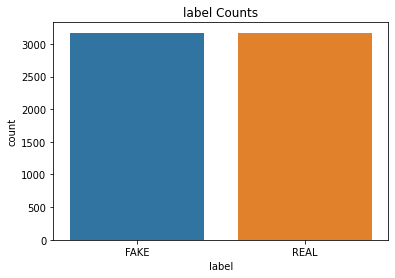

In [85]:
# Print the counts of each category
print(data['label'].value_counts())

# Print the proportions of each category
print(data['label'].value_counts(normalize=True))

# Visualize the Categories
sns.countplot(data['label'])
plt.title("label Counts")
plt.show()

In [86]:
# data['label'] = pd.Categorical(pd.factorize(data['label'])[0])
# data.head()

le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data.head(100)


,Unnamed: 0,text,label
0,8476,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,It's primary day in New York and front-runners...,1
...,...,...,...
95,8290,"link There is simply no more denying, for mill...",0
96,6227,Channel list \nFollowing hurricane Matthew's f...,0
97,3255,(CNN) On Veterans Day we recognize and honor t...,1
98,3177,Sparks flew at the toughest and liveliest GOP ...,1


In [87]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [88]:
tokenized_messages = data['text'].str.lower().apply(word_tokenize)

# Print the tokens to see how it looks like
print(tokenized_messages)

0       [daniel, greenfield, ,, a, shillman, journalis...
1       [google, pinterest, digg, linkedin, reddit, st...
2       [u.s., secretary, of, state, john, f., kerry, ...
3       [—, kaydee, king, (, @, kaydeeking, ), novembe...
4       [it, 's, primary, day, in, new, york, and, fro...
                              ...                        
6330    [the, state, department, told, the, republican...
6331    [the, ‘, p, ’, in, pbs, should, stand, for, ‘,...
6332    [anti-trump, protesters, are, tools, of, the, ...
6333    [addis, ababa, ,, ethiopia, —president, obama,...
6334    [jeb, bush, is, suddenly, attacking, trump, .,...
Name: text, Length: 6335, dtype: object


In [89]:
def alpha(tokens):
    """This function removes all non-alphanumeric characters"""
    alpha = []
    for token in tokens:
        if str.isalpha(token) or token in ['n\'t','won\'t']:
            if token=='n\'t':
                alpha.append('not')
                continue
            elif token == 'won\'t':
                alpha.append('wont')
                continue
            alpha.append(token)
    return alpha

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(alpha)

print(tokenized_messages)

0       [daniel, greenfield, a, shillman, journalism, ...
1       [google, pinterest, digg, linkedin, reddit, st...
2       [secretary, of, state, john, kerry, said, mond...
3       [kaydee, king, kaydeeking, november, the, less...
4       [it, primary, day, in, new, york, and, hillary...
                              ...                        
6330    [the, state, department, told, the, republican...
6331    [the, p, in, pbs, should, stand, for, plutocra...
6332    [protesters, are, tools, of, the, oligarchy, a...
6333    [addis, ababa, ethiopia, obama, convened, a, m...
6334    [jeb, bush, is, suddenly, attacking, trump, he...
Name: text, Length: 6335, dtype: object


In [90]:
def remove_stop_words(tokens):
    """This function removes all stop words in terms of nltk stopwords"""
    no_stop = []
    for token in tokens:
        if token not in stopwords.words('english'):
            no_stop.append(token)
    return no_stop

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(remove_stop_words)

print(tokenized_messages)

0       [daniel, greenfield, shillman, journalism, fel...
1       [google, pinterest, digg, linkedin, reddit, st...
2       [secretary, state, john, kerry, said, monday, ...
3       [kaydee, king, kaydeeking, november, lesson, t...
4       [primary, day, new, york, hillary, clinton, do...
                              ...                        
6330    [state, department, told, republican, national...
6331    [p, pbs, stand, plutocratic, pentagon, posted,...
6332    [protesters, tools, oligarchy, always, provoke...
6333    [addis, ababa, ethiopia, obama, convened, meet...
6334    [jeb, bush, suddenly, attacking, trump, matter...
Name: text, Length: 6335, dtype: object


In [91]:
def lemmatize(tokens):
    """This function lemmatize the messages"""
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # Create the lemmatized list
    lemmatized = []
    for token in tokens:
            # Lemmatize and append
            lemmatized.append(lemmatizer.lemmatize(token))
    return " ".join(lemmatized)

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(lemmatize)

print(tokenized_messages)

0       daniel greenfield shillman journalism fellow f...
1       google pinterest digg linkedin reddit stumbleu...
2       secretary state john kerry said monday stop pa...
3       kaydee king kaydeeking november lesson tonight...
4       primary day new york hillary clinton donald tr...
                              ...                        
6330    state department told republican national comm...
6331    p pb stand plutocratic pentagon posted oct wik...
6332    protester tool oligarchy always provokes rage ...
6333    addis ababa ethiopia obama convened meeting le...
6334    jeb bush suddenly attacking trump matter jeb b...
Name: text, Length: 6335, dtype: object


In [92]:
# Replace the columns with tokenized messages
data['text'] = tokenized_messages

# Display the first five rows
data['text'].head(10)

0    daniel greenfield shillman journalism fellow f...
1    google pinterest digg linkedin reddit stumbleu...
2    secretary state john kerry said monday stop pa...
3    kaydee king kaydeeking november lesson tonight...
4    primary day new york hillary clinton donald tr...
5    immigrant grandparent year ago arrived new yor...
6    share baylee luciani left screenshot baylee ca...
7    czech stockbroker saved jewish child nazi germ...
8    hillary clinton donald trump made inaccurate c...
9    iranian negotiator reportedly made push conces...
Name: text, dtype: object

In [93]:
X = data['text']
y = data['label']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)


In [95]:
vectorizer = TfidfVectorizer(strip_accents='ascii')

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

print(tfidf_train)
# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

  (0, 36541)	0.04016469429786352
  (0, 22142)	0.04372916053516484
  (0, 7314)	0.034703171483196064
  (0, 2632)	0.04644695950544188
  (0, 22335)	0.033694580747809684
  (0, 17229)	0.03970856643443335
  (0, 10844)	0.036003591637855666
  (0, 25124)	0.03672798494638696
  (0, 28063)	0.026928029143920174
  (0, 12649)	0.057590022442219536
  (0, 24080)	0.04051168040585652
  (0, 8623)	0.06250068308529566
  (0, 49273)	0.018286835222573485
  (0, 13262)	0.031630448975416524
  (0, 41949)	0.02995511342221935
  (0, 40910)	0.09242368916097486
  (0, 6024)	0.0448125792071175
  (0, 36881)	0.021914219160064884
  (0, 35263)	0.06755734938599461
  (0, 15500)	0.057142585165250025
  (0, 23326)	0.059228993606044
  (0, 27878)	0.040258242728219144
  (0, 14759)	0.01963174205479371
  (0, 34691)	0.04047967836495849
  (0, 16730)	0.0371678605181782
  :	:
  (5067, 44489)	0.02005990017703105
  (5067, 8280)	0.05238063828602126
  (5067, 38110)	0.018535057354453967
  (5067, 34181)	0.09069792958053022
  (5067, 1325)	0.009978

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(tfidf_train, y_train)
print("Accuracy:",clf.score(tfidf_test, y_test))
pickle.dump(clf, open('SaveLR', 'wb'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, verbose=2)
clf.fit(tfidf_train, y_train)
print("Accuracy:",clf.score(tfidf_test, y_test))
pickle.dump(clf, open('SaveRF', 'wb'))

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create model object
# model = MLPClassifier()

model = MLPClassifier(hidden_layer_sizes=(100,100,100),
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
model.fit(tfidf_train, y_train)
print("Accuracy:",model.score(tfidf_test, y_test))
pickle.dump(model, open('SaveMLB', 'wb'))

In [ ]:
nb = MultinomialNB()
nb.fit(tfidf_train, y_train)
print("Accuracy:",nb.score(tfidf_test, y_test))
pickle.dump(nb, open('SaveNB', 'wb'))

In [ ]:
for i in range(1,10,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(tfidf_train,y_train)

    y_pred = model.predict(tfidf_test)

    # Print the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix\n")
    print(cm)

    # Print the Classification Report
    cr = classification_report(y_test, y_pred)
    print("\n\nClassification Report\n")
    print(cr)


    # Print the Receiver operating characteristic Auc score
    auc_score = roc_auc_score(y_test, y_pred)
    print("\nROC AUC Score:",auc_score)

    # Get probabilities.
    y_pred_proba = nb.predict(tfidf_test)

    # Get False Positive rate, True Positive rate and the threshold
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Visualize the ROC curve.
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title('ROC')
    plt.show()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_seq_padded = keras.preprocessing.sequence.pad_sequences(X_train_seq, 50)
X_test_seq_padded = keras.preprocessing.sequence.pad_sequences(X_test_seq, 50)
print(X_test_seq_padded)

from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential


model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 200))
model.add(LSTM(200))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()




model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])



history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))
pickle.dump(model, open('SaveNN', 'wb'))

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
kernelrange=np.array(['rbf'])
param_grid = dict(gamma=gamma_range, C=C_range,kernel=kernelrange)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv, verbose = 3)
grid.fit(tfidf_train, y_train)


print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)
y_pred = grid.predict(tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)


# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:",auc_score)

# Get probabilities.
y_pred_proba = nb.predict(tfidf_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()
pickle.dump(grid, open('Saver_POLY_SVM', 'wb')) 
pickle.dump(grid, open('Saverbf_SVM', 'wb'))

In [ ]:
C_range = np.logspace(-2, 10, 13)
kernelrange=np.array(['linear'])
param_grid = dict( C=C_range,kernel=kernelrange)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv, verbose = 3)
grid.fit(tfidf_train, y_train)


print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)
y_pred = grid.predict(tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)


# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:",auc_score)

# Get probabilities.
y_pred_proba = nb.predict(tfidf_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()
pickle.dump(grid, open('Saver_POLY_SVM', 'wb')) 
pickle.dump(grid, open('Saver_linear_SVM', 'wb'))  

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
degree_range = np.array([2,3,4,5])
kernelrange=np.array(['poly'])
param_grid = dict(degree=degree_range, C=C_range,kernel=kernelrange)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv, verbose = 3)
grid.fit(tfidf_train, y_train)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)
 
y_pred = grid.predict(tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)


# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:",auc_score)

# Get probabilities.
y_pred_proba = nb.predict(tfidf_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()
pickle.dump(grid, open('Saver_POLY_SVM', 'wb')) 

In [ ]:
loaded_model = pickle.load(open('SaveLR', 'rb'))
result = loaded_model.score(tfidf_test, y_test)
print(result)
# Predict the labels
y_pred = loaded_model.predict(tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)


# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:",auc_score)

# Get probabilities.
y_pred_proba = nb.predict(tfidf_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

In [ ]:
loaded_model = pickle.load(open('SaveRF', 'rb'))
result = loaded_model.score(tfidf_test, y_test)
print(result)
# Predict the labels
y_pred = loaded_model.predict(tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)


# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:",auc_score)

# Get probabilities.
y_pred_proba = nb.predict(tfidf_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

In [ ]:
loaded_model = pickle.load(open('SaveNB', 'rb'))
result = loaded_model.score(tfidf_test, y_test)
print(result)
# Predict the labels
y_pred = loaded_model.predict(tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)


# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:",auc_score)

# Get probabilities.
y_pred_proba = nb.predict(tfidf_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

In [ ]:
loaded_model = pickle.load(open('SaveMLP', 'rb'))
result = loaded_model.score(tfidf_test, y_test)
print(result)
# Predict the labels
y_pred = loaded_model.predict(tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)


# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:",auc_score)

# Get probabilities.
y_pred_proba = nb.predict(tfidf_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()